## Twigs - Figure 4

This notebook creates the plots presented in Figure 4 of the FlyWire paper. 

In [1]:
import collections
import os
import dill
import warnings
import pandas as pd
import numpy as np

warnings.filterwarnings("ignore")

In [2]:
from flywirepaper import plotting

## Define relevant paths and create directories

In [3]:
data_dir = f"{os.path.realpath('')}/../data"
figure_dir = f"{os.path.realpath('')}/../figures/figure_4/"
figure_source_dir = f"{os.path.realpath('')}/../figures/figure_source_4/"

if not os.path.exists(figure_dir):
    os.makedirs(figure_dir)
    
if not os.path.exists(figure_source_dir):
    os.makedirs(figure_source_dir)

## Twig analysis

In [4]:
twig_syn_df = pd.read_csv(f"{data_dir}/twig_synapse_annotations.csv")

In [5]:
def is_pre(tag):
    return "(pre)" in tag

def is_post(tag):
    return "(post)" in tag

def clean_tag(tag):
    return tag.replace("(post) ", "").replace("(pre) ", "").replace("BB", "backbone").replace("orphan twig", "twig - oprhan").replace("attached twig", "twig - attached")

pre_dict = collections.defaultdict(int)
post_dict = collections.defaultdict(int)
stat_dict = collections.Counter()

for anno_tags in twig_syn_df["Tags"].values:
    if not isinstance(anno_tags, str):
        stat_dict["empty tag"] += 1
        continue
    if "not syn" in anno_tags:
        stat_dict["not a synapse"] += 1
        continue
    if "syn-not sure" in anno_tags:
        stat_dict["ambiguous synapse"] += 1
        continue
    
    has_pre = is_pre(anno_tags)
    has_post = is_post(anno_tags)

    if has_pre and has_post:
        for tag in anno_tags.split(","):
            if is_pre(tag):
                pre_dict[clean_tag(tag)] += 1
            if is_post(tag):
                post_dict[clean_tag(tag)] += 1
        stat_dict["annotated"] += 1
    else:
        stat_dict["not pre & post annotated"] += 1

#### Statistics of the labeling effort

In [6]:
pd.DataFrame({"Count": stat_dict})

,Count
ambiguous synapse,99
annotated,612
empty tag,1
not a synapse,285
not pre & post annotated,3


#### Statistics of the locations identified as true synapses

In [7]:
pd.DataFrame({"pre": pre_dict, "post": post_dict})

,pre,post
backbone,534,53
twig - attached,61,228
twig - oprhan,17,331


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


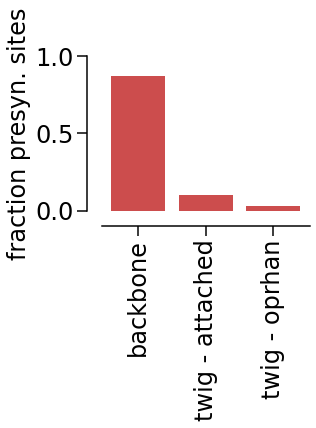

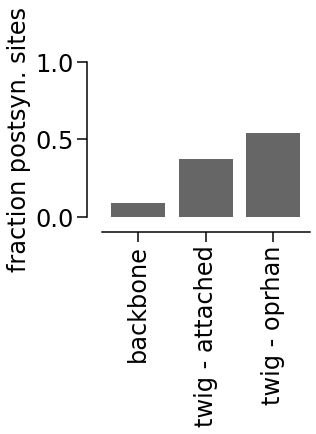

In [8]:
pre_sum = np.sum(list(pre_dict.values()))
post_sum = np.sum(list(post_dict.values()))

plotting.bar_plot(np.sort(list(pre_dict.keys())),
                  [pre_dict[k] / pre_sum for k in np.sort(list(pre_dict.keys()))], 
                  ylabel="fraction presyn. sites", color=[.8, .3, .3],
                  figsize=(4.5, 5.5), xlabel_rotation=90, yrange=[0, 1],
                  tick_label_size=24,
                  path=f"{figure_dir}/frac_pre_synaptic_syn.png")


plotting.bar_plot(np.sort(list(post_dict.keys())),
                  [post_dict[k] / post_sum for k in np.sort(list(post_dict.keys()))], 
                  ylabel="fraction postsyn. sites", color=".4",
                  figsize=(4.5, 5.5), xlabel_rotation=90, yrange=[0, 1],
                  tick_label_size=24,
                  path=f"{figure_dir}/frac_post_synaptic_syn.png")

In [9]:
pd.DataFrame({"pre": pre_dict, "post": post_dict}).to_csv(f"{figure_source_dir}/bc_source.csv")